In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch.nn as nn
import torch.optim as optim

In [3]:
from training import Coach
from utils import MnistData
from models import ModelManager, ModelType

In [4]:
data = MnistData()

In [5]:
performences = []

In [6]:
for i in range(100):
    print(f'Round {i}')
    gerta = ModelManager.get_untrained(ModelType.MnistCnnGerta)
    Coach.train(
        gerta,
        data,
        nn.CrossEntropyLoss(reduction='sum'),
        optim.SGD(gerta.parameters(), lr=1e-2),
        30,
        5001,
        5000
    )
    performences.append(Coach.measure_performance(gerta, data))

Round 0
Training started at 1644611264.6581516
Epoch 0: 69.07447052001953
Epoch 5000: 44.75099182128906
Training finished at 1644611302.3940723; lasted 37.735920667648315 seconds.
96.21 % success on test data
Round 1
Training started at 1644611303.5357993
Epoch 0: 69.14045715332031
Epoch 5000: 45.8369255065918
Training finished at 1644611341.2930045; lasted 37.75720524787903 seconds.
96.21 % success on test data
Round 2
Training started at 1644611342.445297
Epoch 0: 69.07465362548828
Epoch 5000: 45.80278778076172
Training finished at 1644611380.3218906; lasted 37.876593589782715 seconds.
88.52 % success on test data
Round 3
Training started at 1644611381.4515128
Epoch 0: 69.12589263916016
Epoch 5000: 44.013755798339844
Training finished at 1644611419.2061155; lasted 37.754602670669556 seconds.
96.54 % success on test data
Round 4
Training started at 1644611420.311299
Epoch 0: 69.05046844482422
Epoch 5000: 47.69350051879883
Training finished at 1644611456.5117478; lasted 36.200448751449

In [7]:
import json
with open('Gerta_performances.json', 'w') as file:
    json.dump(performences, file)

In [8]:
print(f'--- Foundings in experiment ---')
print(f'Mean performance: {sum(performences) / len(performences)}')
print(f'Max performance: {max(performences)}')
print(f'Min performance: {min(performences)}')

--- Foundings in experiment ---
Mean performance: 0.9526899999999999
Max performance: 0.9751
Min performance: 0.8659


In [9]:
import matplotlib.pyplot as pl
import matplotlib as mp
import matplotlib.pylab as lab

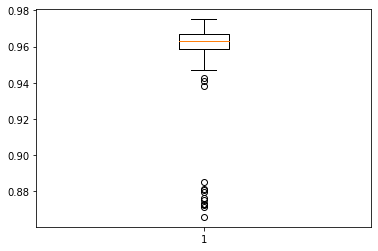

In [10]:
plot = pl.boxplot(performences)

In [11]:
performences.sort()


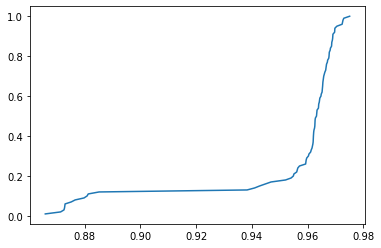

In [12]:
distribution = {}
for i in range(1, len(performences) + 1):
    distribution[performences[i - 1]] = i / len(performences)
my_list = distribution.items()
sorted(my_list)
x, y = zip(*my_list)
lab.plot(x, y)